feature 0 threshold 4.4 gain [0.00661608]
The threshold and gain 4.4   [0.00661608]
feature 0 threshold 4.5 gain [0.02023743]
The threshold and gain 4.5   [0.02023743]
feature 0 threshold 4.6 gain [0.0272504]
The threshold and gain 4.6   [0.0272504]
feature 0 threshold 4.7 gain [0.04914804]
The threshold and gain 4.7   [0.04914804]
feature 0 threshold 4.8 gain [0.05674825]
The threshold and gain 4.8   [0.05674825]
feature 0 threshold 4.9 gain [0.08051913]
The threshold and gain 4.9   [0.08051913]
feature 0 threshold 5.0 gain [0.08232605]
The threshold and gain 5.0   [0.08232605]
feature 0 threshold 5.1 gain [0.10829932]
The threshold and gain 5.1   [0.10829932]
feature 0 threshold 5.2 gain [0.16933821]
The threshold and gain 5.2   [0.16933821]
feature 0 threshold 5.3 gain [0.19172982]
The threshold and gain 5.3   [0.19172982]
feature 0 threshold 5.4 gain [0.20342287]
The threshold and gain 5.4   [0.20342287]
feature 0 threshold 5.5 gain [0.24063492]
The threshold and gain 5.5   [0.2406

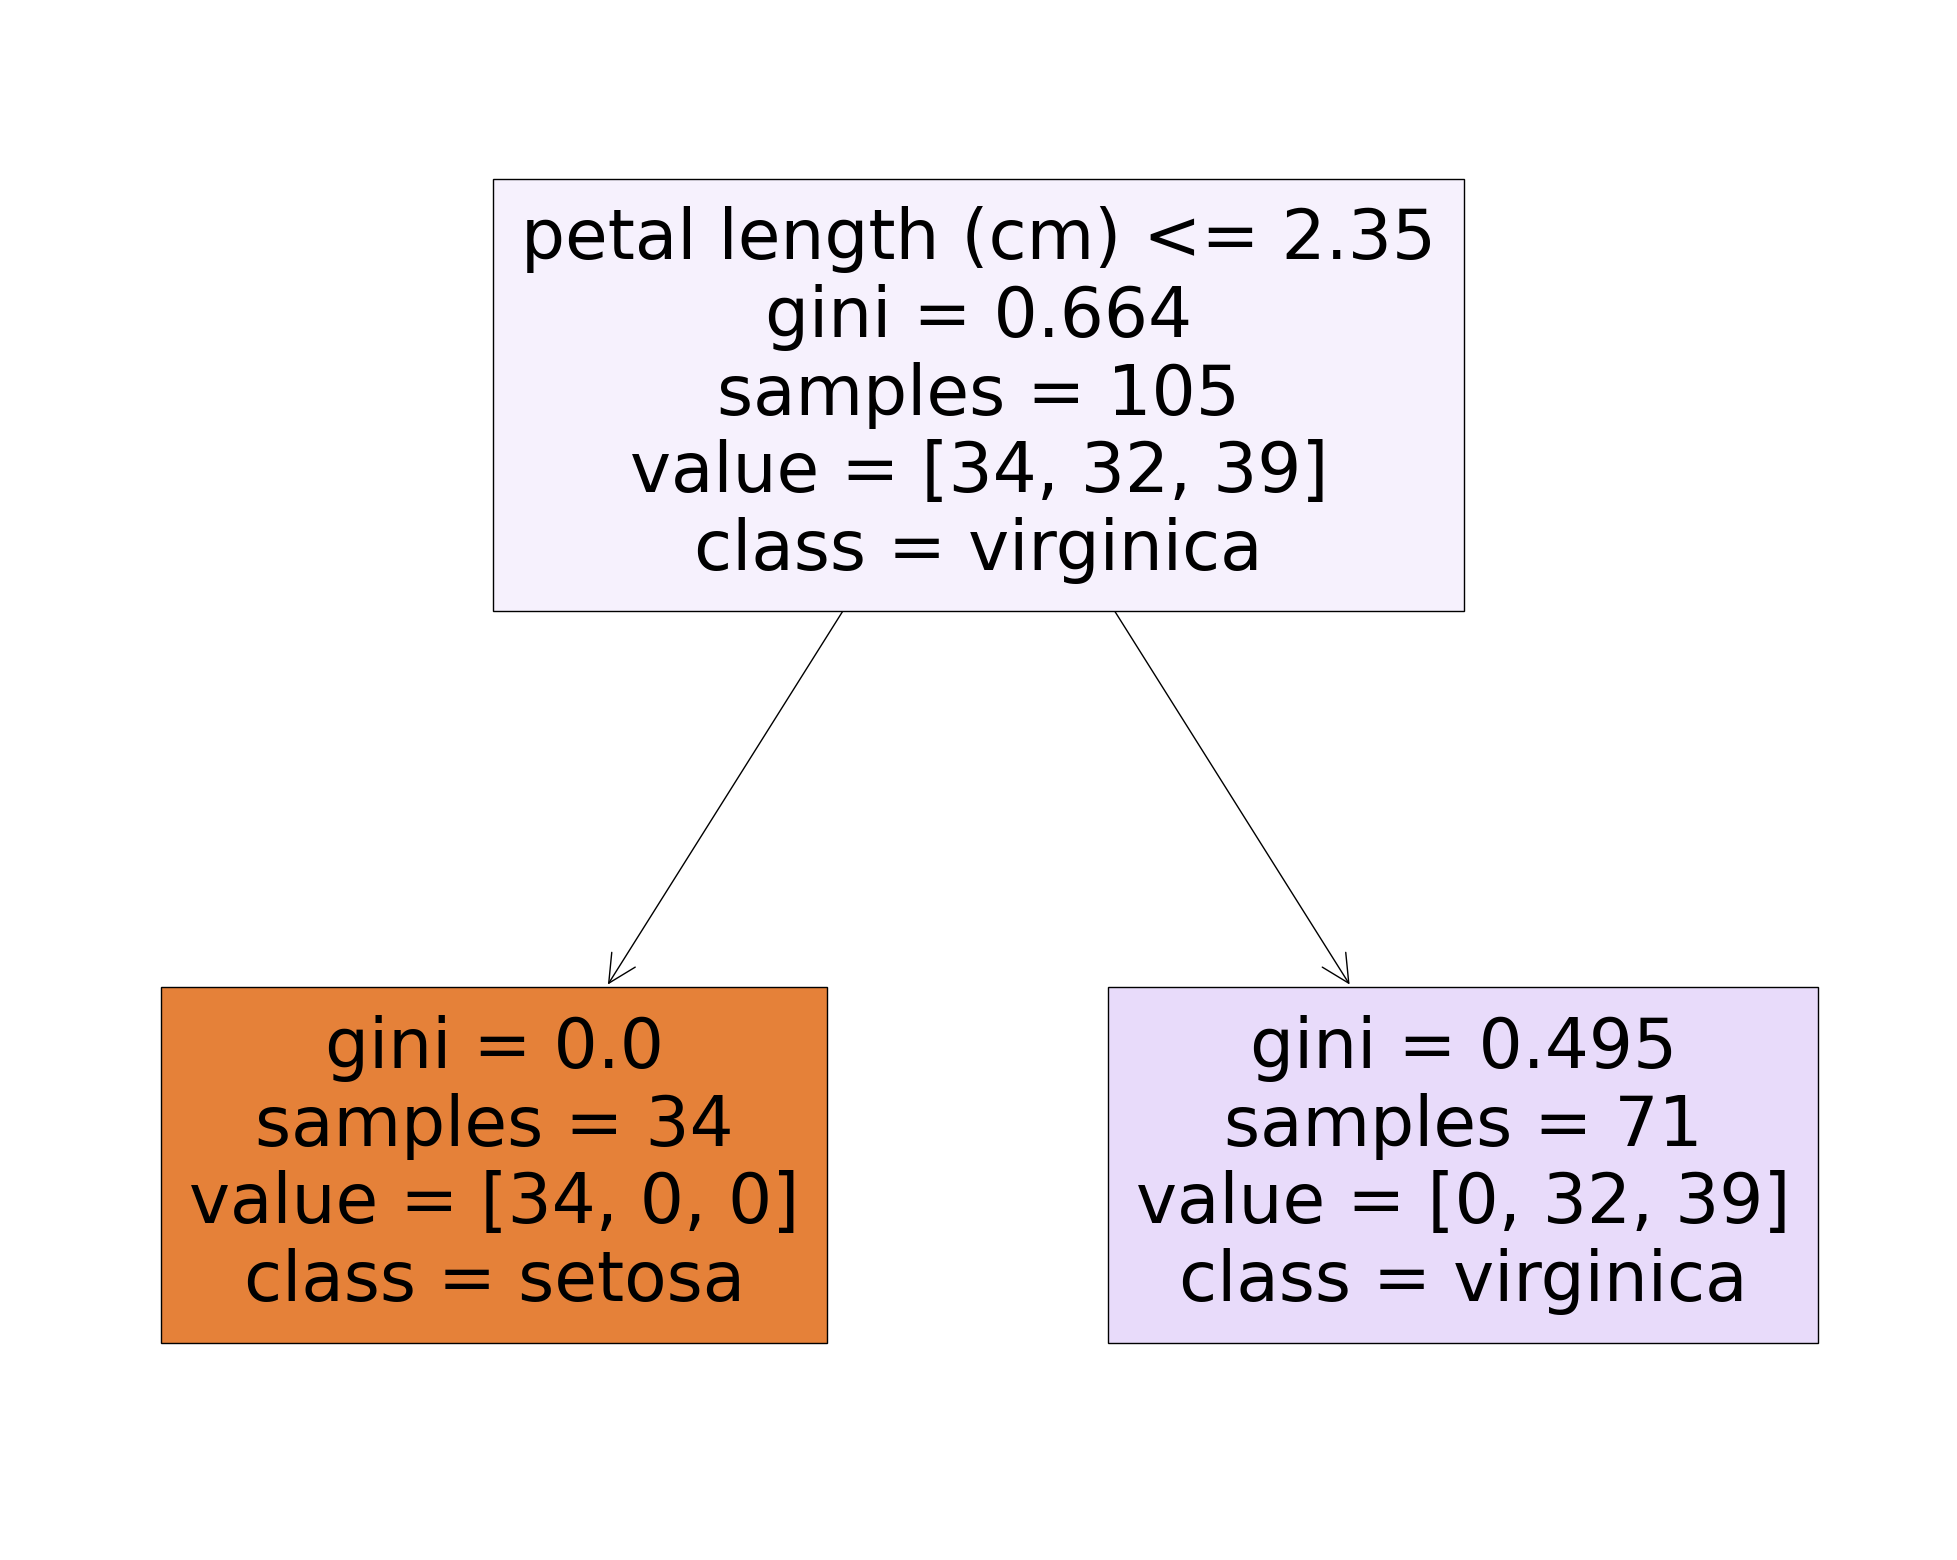

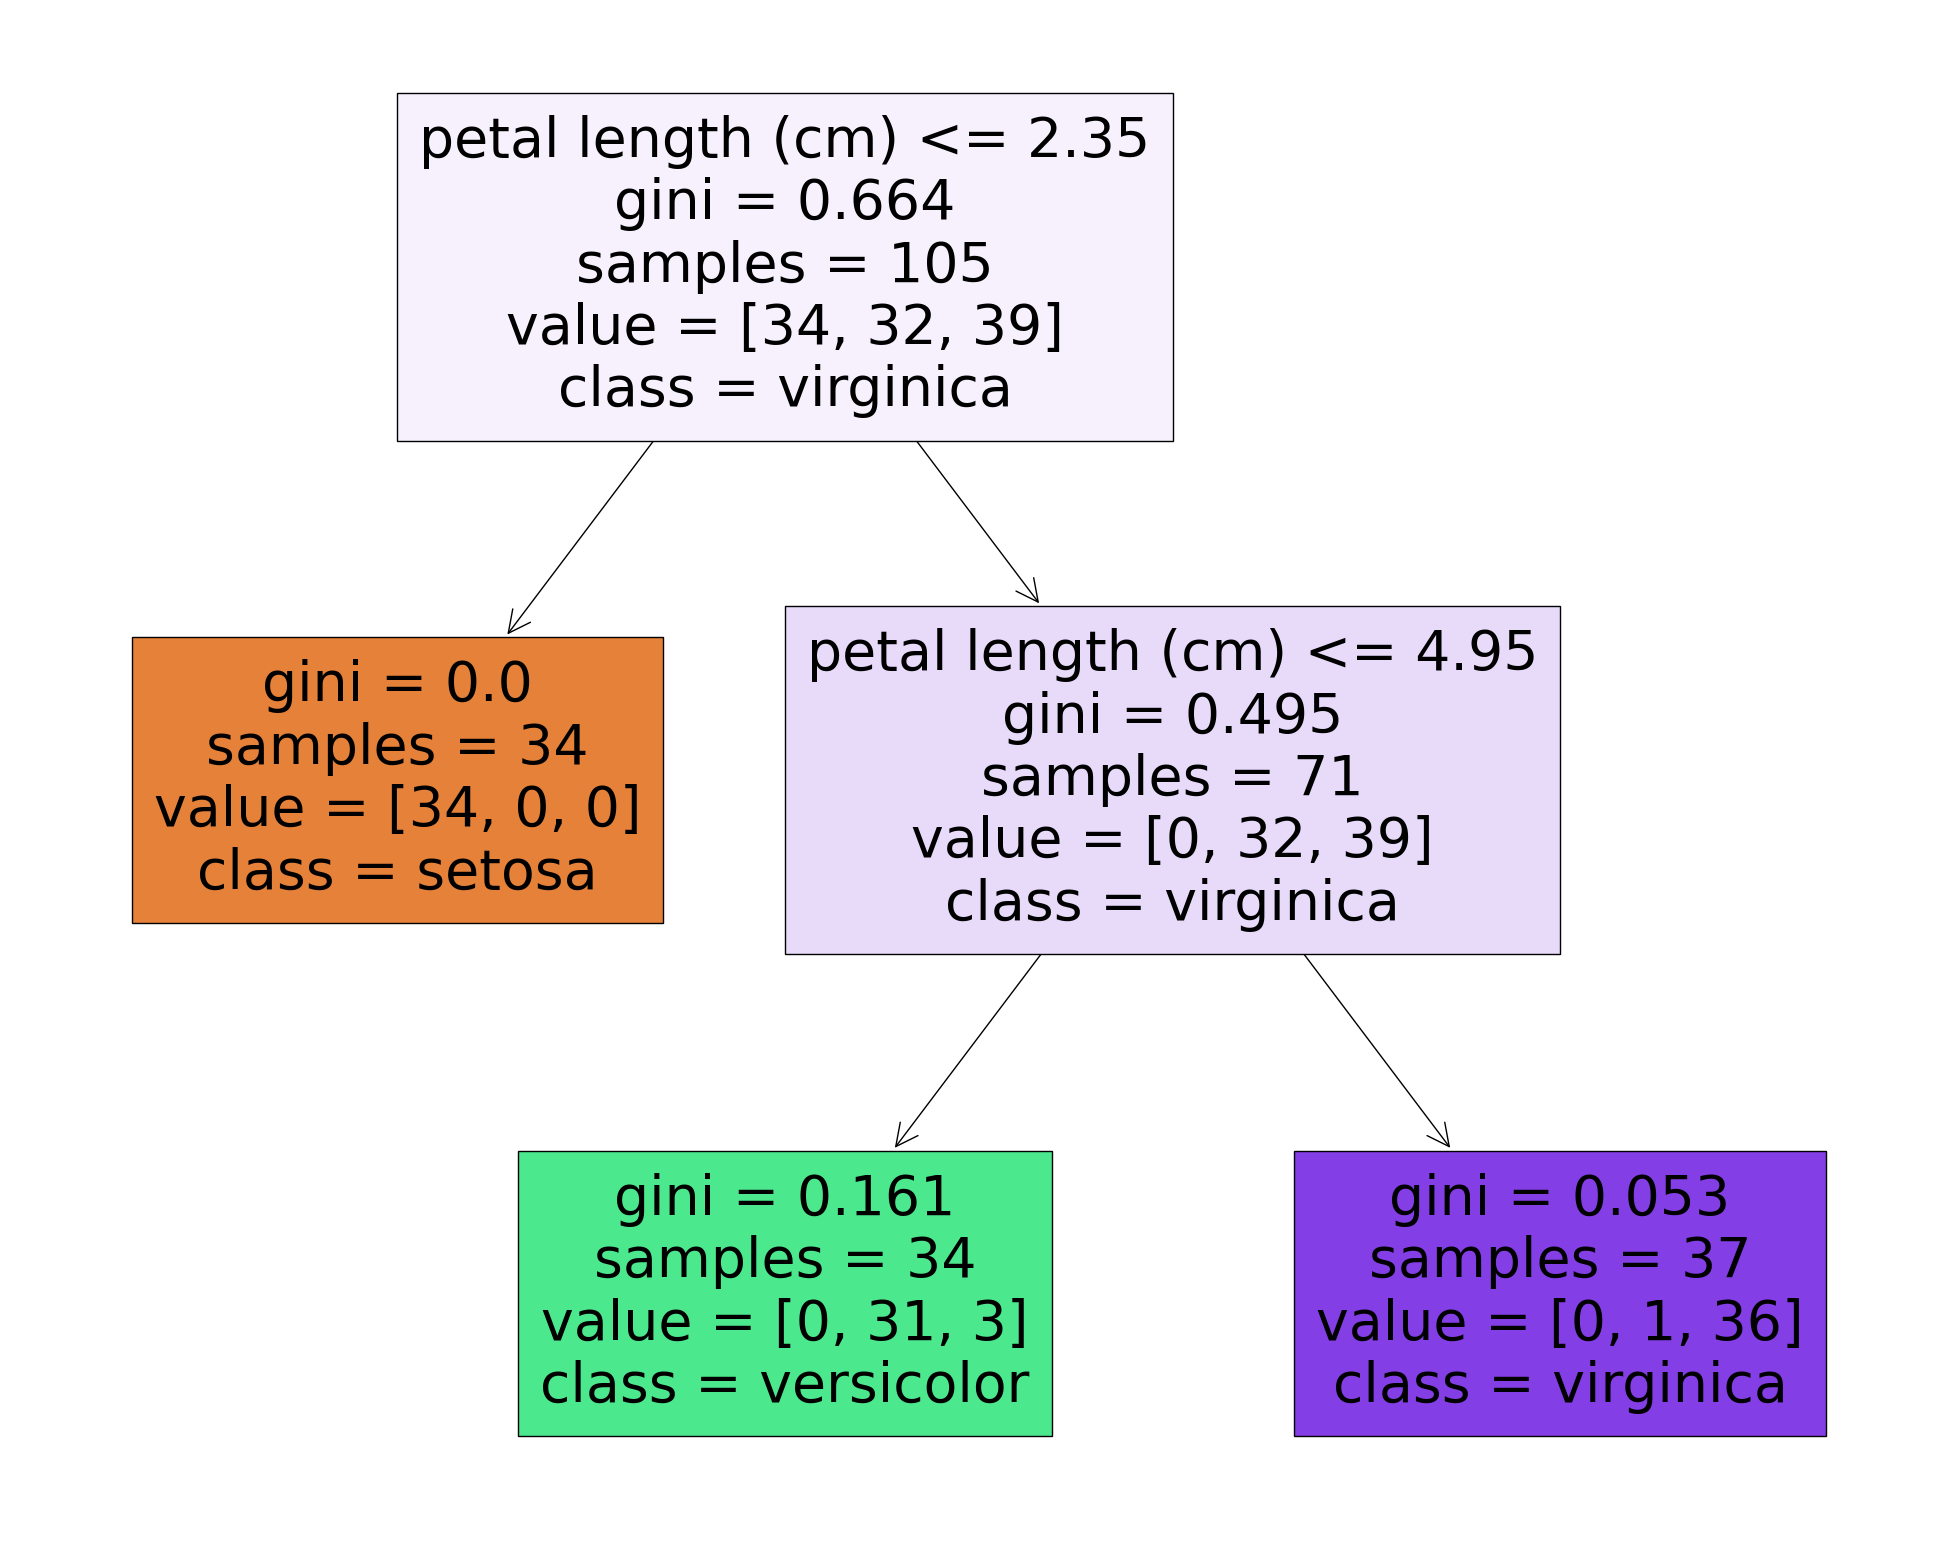

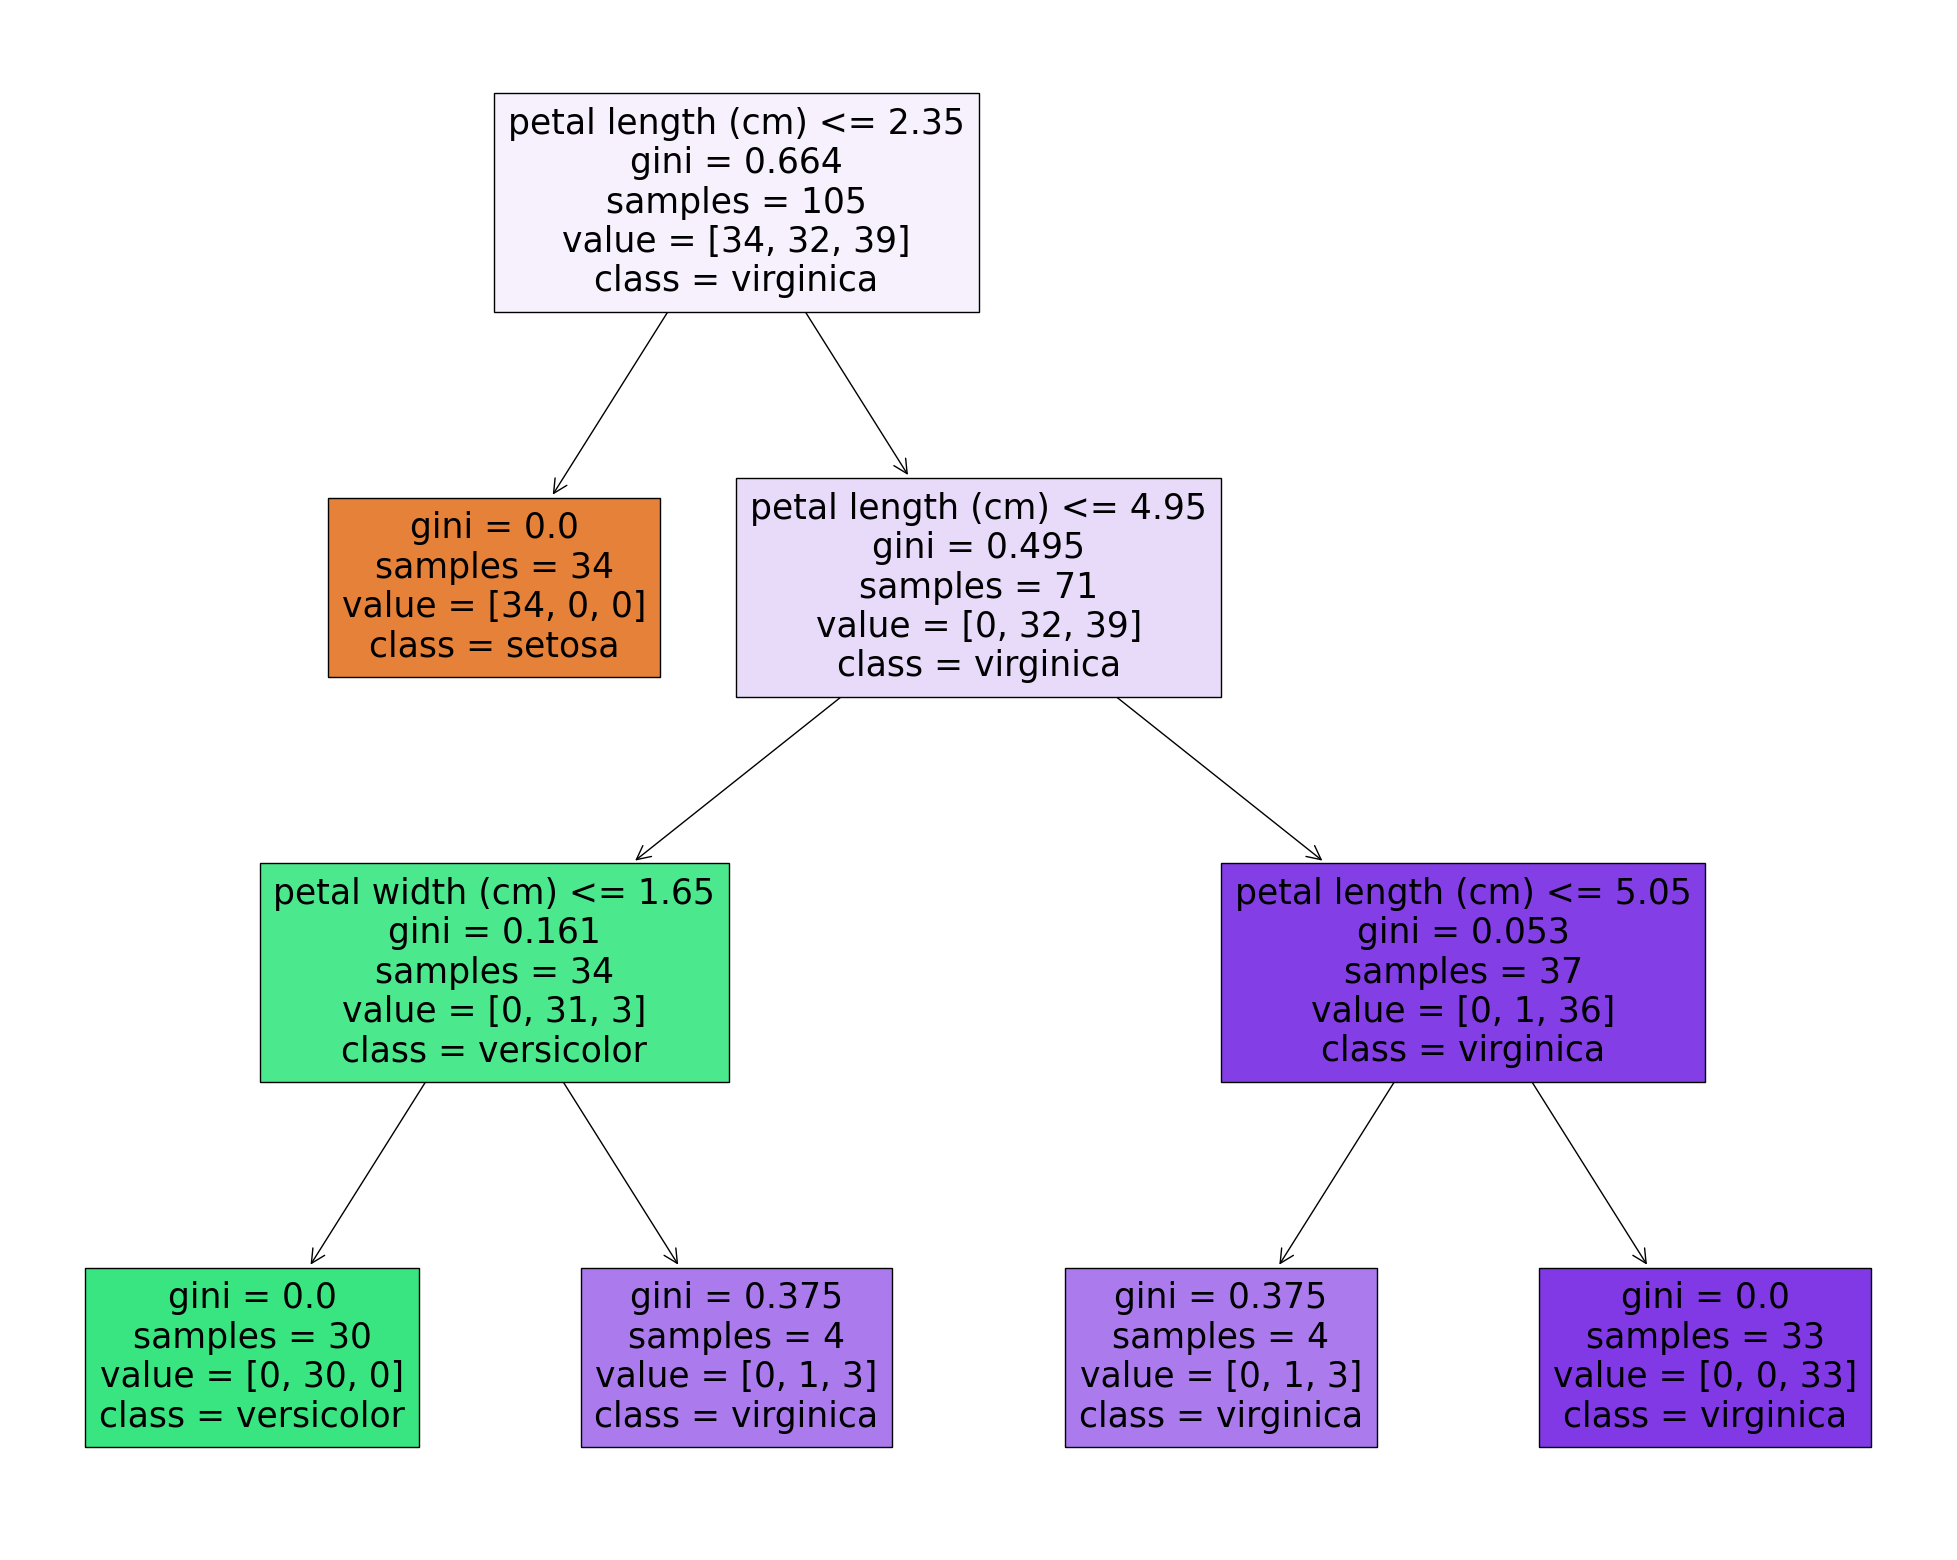

In [26]:
# Assignment: Decision tree
# Objectives:
# 1. Understanding decision trees through scratches
# 2. Get used to implementing complex algorithms
# -------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import collections
import matplotlib.pyplot as plt


class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """

    def __init__(self, verbose):
        # Record hyperparameters as attributes
        self.verbose = verbose

    # Problem 3: Learning
    # -------------------
    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        self.gain = 0
        for feature_index in range(X.shape[1]):
            self.thresholds = np.unique(X[:,feature_index])
            for threshold in self.thresholds:
                _gain = self._calc_ig(X,feature_index,y,threshold)
                if _gain > self.gain:
                    self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                    self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                    self.feature = feature_index
                    self.threshold = threshold
                    self.gain = _gain
                    if self.verbose:
                        print('feature',self.feature,'threshold',self.threshold,'gain',self.gain)
                    if self.verbose == True:
                        print('The threshold and gain {}   {}'.format(threshold,self.gain))
        pass

    # Problem 4: Estimate
    # -------------------
    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        prediction = np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)
        return prediction
        
        
    #  Problem 1: Function for finding impureness
    # -------------------------------------------
    def _calc_gini(self,y):
        labels,counts = np.unique(y,return_counts=True)
        _gini = 0
        for label in labels:
            _gini += (counts[labels==label]/np.sum(counts))**2
        gini = 1 - _gini
        return gini
    
    # Problem 2: Function for finding information gain 
    # ------------------------------------------------
    def _calc_ig(self,X,feature_index,y,threshold):
        labels_l = y[X[:,feature_index] < threshold]
        labels_r = y[X[:,feature_index] >= threshold]
        gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
        gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
        gain = self._calc_gini(y) -gain_l -gain_r
        return gain

# Problem 5: Learning and estimation 
# ----------------------------------
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],test_size=0.3, random_state=0)
clf = ScratchDecesionTreeClassifierDepth1(verbose = True)
clf.fit(X_train, y_train)
train_prediction = clf.predict(X_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_train, train_prediction)

from sklearn.metrics import precision_score
precision_score(y_train, train_prediction, average='micro')

from sklearn.metrics import recall_score
recall_score(y_train, train_prediction, average='micro')

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X_train,y_train)

# Predict Accuracy Score
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))


#  Problem 6: Visualization of decision area
#  -----------------------------------------
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris_dataset.feature_names,  
                   class_names=iris_dataset.target_names,
                   filled=True)

# Problem 7: (Advance assignment) Creation of a decision tree classifier class with a depth of 2
# ----------------------------------------------------------------------------------------------
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train,y_train)

# Predict Accuracy Score
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris_dataset.feature_names,  
                   class_names=iris_dataset.target_names,
                   filled=True)

# Problem 8: (Advance assignment) Creation of decision tree classifier class with unlimited depth
# -----------------------------------------------------------------------------------------------
N = 3
clf = DecisionTreeClassifier(max_depth=N)
clf.fit(X_train,y_train)

# Predict Accuracy Score
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris_dataset.feature_names,  
                   class_names=iris_dataset.target_names,
                   filled=True)